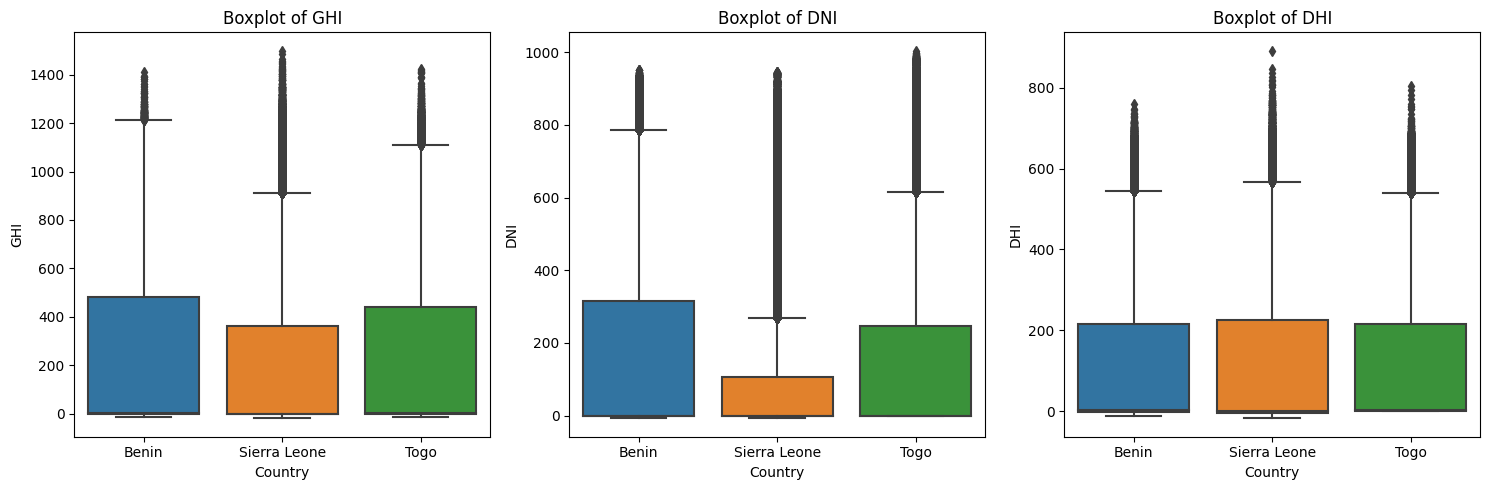

                GHI_mean  GHI_median     GHI_std    DNI_mean  DNI_median  \
Country                                                                    
Benin         240.559452         1.8  331.131327  167.187516        -0.1   
Sierra Leone  201.957515         0.3  298.495150  116.376337        -0.1   
Togo          230.555040         2.1  322.532347  151.258469         0.0   

                 DNI_std    DHI_mean  DHI_median     DHI_std  
Country                                                       
Benin         261.710501  115.358961         1.6  158.691074  
Sierra Leone  218.652659  113.720571        -0.1  158.946032  
Togo          250.956962  116.444352         2.5  156.520714  
ANOVA p-value: 0.0


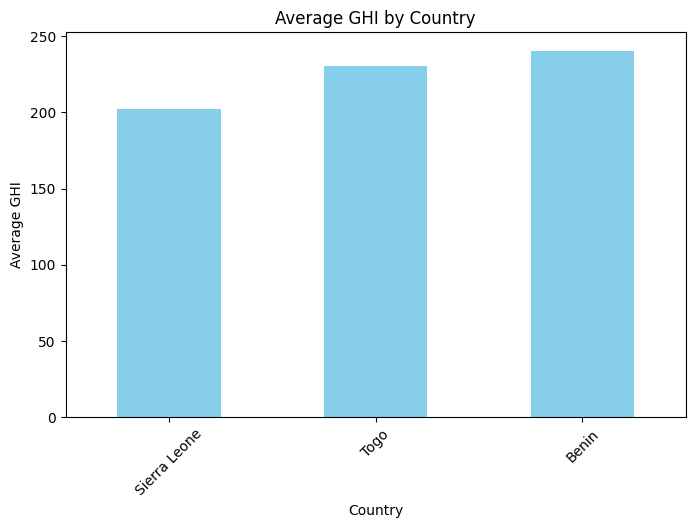

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import os

def load_data(path, country_name):
    """Load data and assign country name."""
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    data = pd.read_csv(path)
    data['Country'] = country_name
    return data

def combine_data(benin_data, sierra_leone_data, togo_data):
    """Combine datasets into a single DataFrame."""
    return pd.concat([benin_data, sierra_leone_data, togo_data])

def plot_boxplots(combined_data):
    """Create boxplots for GHI, DNI, and DHI."""
    metrics = ['GHI', 'DNI', 'DHI']
    plt.figure(figsize=(15, 5))

    for i, metric in enumerate(metrics):
        plt.subplot(1, 3, i + 1)
        sns.boxplot(x='Country', y=metric, data=combined_data)
        plt.title(f'Boxplot of {metric}')
        plt.ylabel(metric)

    plt.tight_layout()
    plt.show()

def summary_statistics(combined_data):
    """Calculate summary statistics for GHI, DNI, and DHI."""
    summary_stats = combined_data.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
    summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]
    return summary_stats

def run_anova(benin_data, sierra_leone_data, togo_data):
    """Run ANOVA on GHI values and return p-value."""
    benin_ghi = benin_data['GHI']
    sierra_leone_ghi = sierra_leone_data['GHI']
    togo_ghi = togo_data['GHI']
    f_statistic, p_value = f_oneway(benin_ghi, sierra_leone_ghi, togo_ghi)
    return p_value

def plot_average_ghi(combined_data):
    """Plot average GHI by country."""
    avg_ghi = combined_data.groupby('Country')['GHI'].mean().sort_values()
    plt.figure(figsize=(8, 5))
    avg_ghi.plot(kind='bar', color='skyblue')
    plt.title('Average GHI by Country')
    plt.ylabel('Average GHI')
    plt.xticks(rotation=45)
    plt.show()

# Load datasets
try:
    benin_data = load_data('data/benin_clean.csv', 'Benin')
    sierra_leone_data = load_data('data/sierraleone-bumbuna_clean.csv', 'Sierra Leone')
    togo_data = load_data('data/togo-dapaong_qc_clean.csv', 'Togo')

    # Combine data
    combined_data = combine_data(benin_data, sierra_leone_data, togo_data)

    # Plot boxplots
    plot_boxplots(combined_data)

    # Get summary statistics
    summary_stats = summary_statistics(combined_data)
    print(summary_stats)

    # Run ANOVA and print p-value
    p_value = run_anova(benin_data, sierra_leone_data, togo_data)
    print(f'ANOVA p-value: {p_value}')

    # Plot average GHI
    plot_average_ghi(combined_data)

# Key Observations
   
    #Benin exhibits the highest median GHI, indicating strong solar potential, but also shows the greatest variability in solar radiation.
    #Sierra Leone has the lowest standard deviation in GHI values, suggesting a more consistent solar energy output compared to the other countries.
    #Togo ranks in the middle for average GHI, but displays significant differences in DNI, highlighting unique characteristics in its solar resource distribution.


except FileNotFoundError as e:
    print(e)